# Part I - Ford GoBike Dataset Exploration
## by Bryan Willis

## Introduction
The dataset used for this project is the Ford GoBike System Data, which is a dataset covering the individual rides made by the bike-sharing system which covers the Greater San Francisco area. This dataset covers all rides that start in February 2019 and contains both start/end time of the ride, name of the start/end station, location of the start/end station, the ID of the bike, and information about the user such as the gender and year of birth.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Check for null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


Seems like there are nulls for the following 6 columns: start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year and member_gender. These rows will need to be removed from the dataset

In [4]:
#Drop nulls for any column
df = df.dropna()

In [5]:
#Check to see if the nulls were dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


### Check for duplicated values

In [6]:
#Check for duplicated values
df.duplicated().any()

False

### Assess data types

In [7]:
#Asses the data types for each column to see if they are reasonable
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [8]:
#Convert start_time and end_time to datetime types
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [9]:
#Convert start_station_id, end_station_id and member_birth_year to int first
#this will remove the trailing 0
df.start_station_id = df.start_station_id.astype(int)
df.end_station_id = df.end_station_id.astype(int)
df.member_birth_year = df.member_birth_year.astype(int)

In [10]:
#Convert start_station_id, end_station_id and bike_id to str
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

In [11]:
#Check to make sure the data types are changed
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

### Create start/end day columns

In [12]:
df['start_day'] = df.start_time.dt.day
df['end_day'] = df.end_time.dt.day

### Create start/end hour columns

In [13]:
df['start_hour'] = df.start_time.dt.hour
df['end_hour'] = df.end_time.dt.hour

### Create birth year group column

In [14]:
def grouped_birth (row):
    if row['member_birth_year'] >= 1940 and row['member_birth_year'] <= 1949 :
        return '40s'
    elif row['member_birth_year'] >= 1950 and row['member_birth_year'] <= 1959 :
        return '50s'
    elif row['member_birth_year'] >= 1960 and row['member_birth_year'] <= 1969 :
        return '60s'
    elif row['member_birth_year'] >= 1970 and row['member_birth_year'] <= 1979 :
        return '70s'
    elif row['member_birth_year'] >= 1980 and row['member_birth_year'] <= 1989 :
        return '80s'
    elif row['member_birth_year'] >= 1990 and row['member_birth_year'] <= 1999 :
        return '90s'
    elif row['member_birth_year'] >= 2000 and row['member_birth_year'] <= 2009 :
        return '2000s'
    elif row['member_birth_year'] >= 2010:
        return '2010s' 

In [15]:
### Create year of birth grouped
df['birth_group'] = df.apply(grouped_birth, axis=1)

### Create Duration in minutes

In [16]:
df['duration_min'] = df.duration_sec / 60

### Create Duration in hours

In [17]:
df['duration_hour'] = df.duration_min / 60

In [18]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day,start_hour,end_hour,birth_group,duration_min,duration_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,1984,Male,No,28,1,17,8,80s,869.750000,14.495833
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,28,1,12,5,70s,1030.900000,17.181667
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,1989,Other,No,28,1,17,4,80s,608.166667,10.136111
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,28,1,23,0,70s,26.416667,0.440278
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,1959,Male,No,28,1,23,0,50s,29.883333,0.498056


### Remove trips longer than 8 hours

In [19]:
df = df.query('duration_hour <= 8')

In [20]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day,start_hour,end_hour,birth_group,duration_min,duration_hour
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,28,1,23,0,70s,26.416667,0.440278
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,1959,Male,No,28,1,23,0,50s,29.883333,0.498056
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,...,1983,Female,No,28,1,23,0,80s,19.116667,0.318611
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,...,1989,Male,No,28,1,23,0,80s,26.916667,0.448611
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,...,1988,Other,No,28,1,23,0,80s,26.166667,0.436111


In [21]:
df.shape

(174824, 23)

In [22]:
df.to_csv('bikeshare_clean.csv', index=False)

### What is the structure of your dataset?

The data set contains 23 columns and 174824 rows with each row pertaining to a 'trip' on the bikeshare system. Each row contains the trip duration, the start and end times, information on the start and end stations, and information about the user such as their user status and year of birth.

### What is/are the main feature(s) of interest in your dataset?

Some interesting features in the dataset are the trip durations, start/end time as well as station locations. This can be combined with the user information to further see whether the trends differ between different user types as well as other information about the users.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The trip duration, start/end times, start/end station as well as user type, member birth year and member gender.

## Univariate Exploration


### Distribution of trip duration (min)

[Text(0.5,0,'Trip duration (min)'),
 Text(0.5,1,'Trip Duration Distribution (min)')]

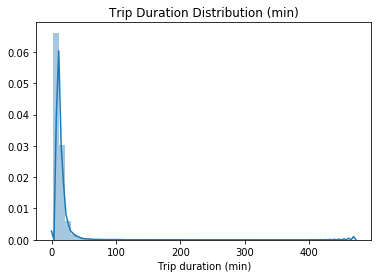

In [23]:
sb.distplot(df['duration_min']).set(title='Trip Duration Distribution (min)', xlabel='Trip duration (min)')

From the grph above we can see that majority of trips happen under 100 minutes and that most trips peak around the 60 minute mark as indicated by the spike.

### Distribution of trip duration (hour)

[Text(0.5,0,'Trip duration (hour)'),
 Text(0.5,1,'Trip Duration Distribution (hour)')]

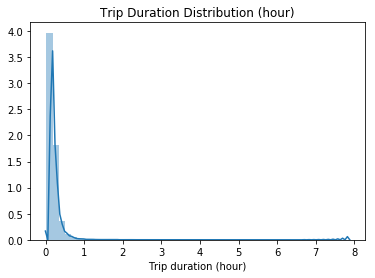

In [24]:
sb.distplot(df['duration_hour']).set(title='Trip Duration Distribution (hour)', xlabel='Trip duration (hour)')

When we look at the duration from an  hour perspective, we can see even more clearly that most trips made on the system fall under an hour. There are a couple of trips made that span around 7-8 hours but these are likely outliers.

### Distribution of start day for a trip

Text(0.5,1,'Distribution of start day for a trip')

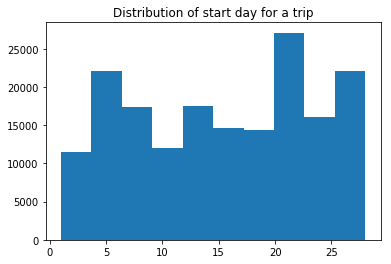

In [25]:
plt.hist(df['start_day'])
plt.title('Distribution of start day for a trip')

For the distribution of the trip start days, it is quite clear that there is a preference for starting trips towards the end of the month and towards the beginning of the month.

### User Type Breakdown

[Text(0,0.5,'Counts'),
 Text(0.5,0,'User type'),
 Text(0.5,1,'User Type Breakdown')]

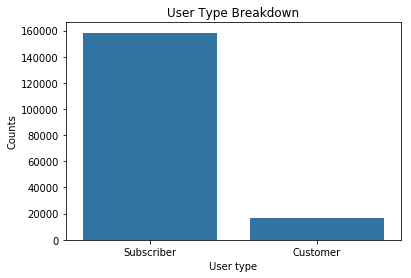

In [26]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color).set(title='User Type Breakdown', xlabel='User type', ylabel='Counts')

Breaking down the different users types for the system, we see that subscribers outnumber customers. This is quite logical as someone who has subscribed to the service is likely to use the system more compared to an ocassional customer as the susbcriber has already paid in advance.

### Member Gender Breakdown

[Text(0,0.5,'Counts'),
 Text(0.5,0,'Member gender'),
 Text(0.5,1,'Member Gender Breakdown')]

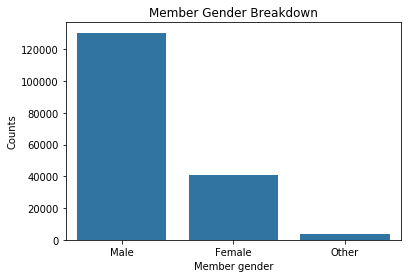

In [27]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_gender', color = base_color).set(title='Member Gender Breakdown', xlabel='Member gender', ylabel='Counts')

The gender breakdown for trips show that trips are heavily skewed towards male users. The amount of users identified as other is quite small comapred to male or female users.

### Start Day Frequency

[Text(0,0.5,'Trip Start Day'),
 Text(0.5,0,'Counts'),
 Text(0.5,1,'Frequency of trip start by day')]

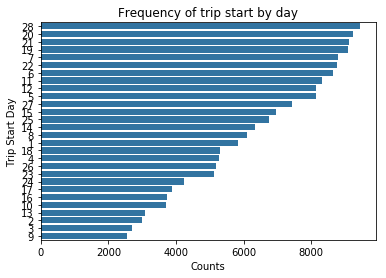

In [28]:
type_counts = df['start_day'].value_counts()
type_order = type_counts.index
sb.countplot(data = df, y = 'start_day', color = base_color, order = type_order).set(title='Frequency of trip start by day', xlabel='Counts', ylabel='Trip Start Day')

When looking at the most frequent days for a trip to start on, we see that days towards the end of the month are quite popular. Days early in the month see smaller amount of trip being made compared to days in the middle of the month.

### Trip start frequency by hour

[Text(0,0.5,'Trip Starting Hour'),
 Text(0.5,0,'Counts'),
 Text(0.5,1,'Frequency of trip start by hour')]

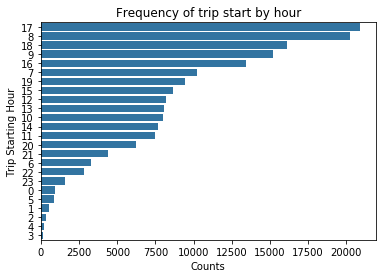

In [29]:
type_counts = df['start_hour'].value_counts()
type_order = type_counts.index
sb.countplot(data = df, y = 'start_hour', color = base_color, order = type_order).set(title='Frequency of trip start by hour',xlabel='Counts', ylabel='Trip Starting Hour')

When looking at the frequency of the trip start time, we can see that the most popular hours surround the typical commuting hours for a 9-5 job.

### User birth group breakdown

[Text(0,0.5,'Birth group'),
 Text(0.5,0,'Count'),
 Text(0.5,1,'Count of users by birth group')]

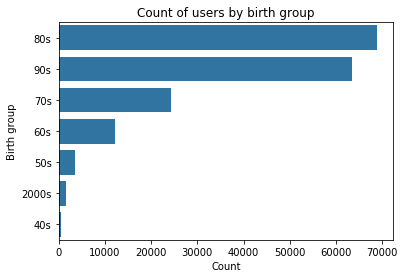

In [30]:
type_counts = df['birth_group'].value_counts()
type_order = type_counts.index
sb.countplot(data = df, y = 'birth_group', color = base_color, order = type_order).set(title='Count of users by birth group',xlabel='Count', ylabel='Birth group')

Breaking down the users by their birth group, we see that those born in the 80s, and 90s make up a large proportion of the user base. Something that is quite surprising is that the youngest group of users (2000s) are quite under represented.

### Bikeshare used for whole trip Breakdown

[Text(0,0.5,'Counts'),
 Text(0.5,0,'Bikeshare used for all trip'),
 Text(0.5,1,'Bikeshare used for whole trip Breakdown')]

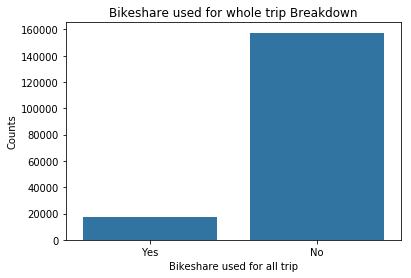

In [31]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'bike_share_for_all_trip', color = base_color).set(title='Bikeshare used for whole trip Breakdown',xlabel='Bikeshare used for all trip', ylabel='Counts')

From the trip purpose breakdown above, we see that the trips being made on the system skew towards using the system only for a part of the trip. Only a small percentage use the system for their whole trip.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- No transformations were needed. 
- The distribution for the trip duration shows a right skewed pattern and shows that most trips are short trips.
- The distribution for start day is pretty interesting as it seems like there are two relatively popular date ranges for when a trip starts - either towards the start of the month or the end.
- As for the user type, it seems like subscribers make up a large portion of the audience, which makes sense as a subscriber is more likely to use the bike share system as they have already subscribed.
- In terms of the gender breakdown, the bike share system tends to be used more by male users than female. There also is a small percentage of users who identify as 'Other'.
- The start day frequency shows that the 28th tends to be the most popular day for trips to start on.
- The start time frequency for the trips show that 5pm and 8am are the most popular. These times are followed by 6pm and 9am. These hours are most popular likely because they correlate to standard work day times.
- The birth group breakdown for the users indicate that the bike share system is most popular with those born in 1980s and 1970s. But it is quite surprising that those born in the 2000s are not using it as frequently.
- The number of trips that used bike share for the whole trip is quite low, with most trips not using bike share for the whole trip.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
- No adjustments or changes were made to the data
- Trip duration is skewed to the right due to the amount of short trips made.
- For unusual distributions, the gender of the bikeshare system tends to be skewed towards male users.
- User type is also heavily skewed towards those that are already exisiting subscribers
- To get the frequency of the start day, start time and birth group, a count procedure was applied to those variables.

## Bivariate Exploration


### Bikeshare used for whole trip by Birth Group

[Text(0,0.5,'Count'),
 Text(0.5,0,'Birth group'),
 Text(0.5,1,'Bikeshare used for whole trip by Birth Group')]

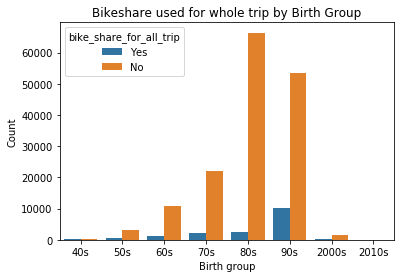

In [43]:
sb.countplot(data = df, x = 'birth_group', hue = 'bike_share_for_all_trip', order = ['40s', '50s','60s','70s','80s','90s','2000s','2010s']).set(title='Bikeshare used for whole trip by Birth Group',xlabel='Birth group', ylabel='Count')

When breaking down whether bikeshare was used for the whole trip by birth group, we see that regardless of the birth group most users did not use bikeshare for the whole trip. Those born in the 90s used the system the most for full trips.

### User Type by Birth Group

[Text(0,0.5,'Counts'),
 Text(0.5,0,'Birth group'),
 Text(0.5,1,'User Type by Birth Group')]

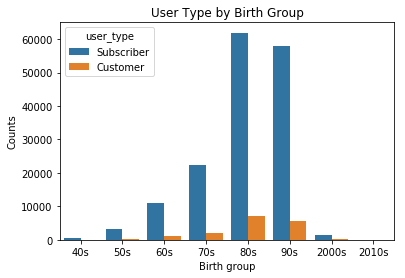

In [44]:
sb.countplot(data = df, x = 'birth_group', hue = 'user_type', order = ['40s', '50s','60s','70s','80s','90s','2000s','2010s']).set(title='User Type by Birth Group',xlabel='Birth group', ylabel='Counts')

When breaking down the user type by birth group, we see that for all birth groups, the count of subscribers is a lot higher than customers. Those born in the 80s have the highest count of customers followed closely by those born in the 90s.

### User Type Breakdown by Gender

[Text(0,0.5,'Counts'), Text(0.5,0,'Gender'), Text(0.5,1,'User Type by Gender')]

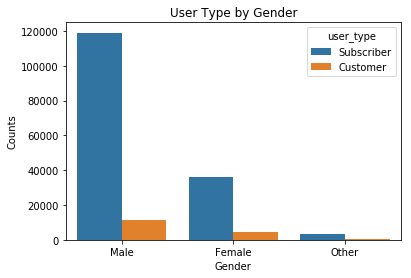

In [34]:
sb.countplot(data = df, x = 'member_gender', hue = 'user_type').set(title='User Type by Gender',xlabel='Gender', ylabel='Counts')

Breaking down user type by gender, we see that males have the highest count of both subscribers and customers. Those identified as other had the lowest counts for both user types.

### Birth Group by Gender

[Text(0,0.5,'Counts'),
 Text(0.5,0,'Birth group'),
 Text(0.5,1,'Birth Group by Gender')]

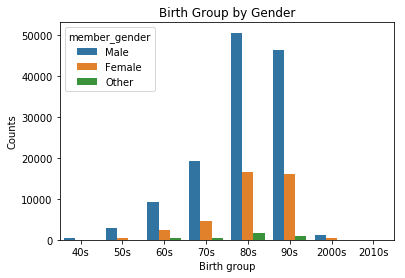

In [45]:
sb.countplot(data = df, x = 'birth_group', hue = 'member_gender', order = ['40s', '50s','60s','70s','80s','90s','2000s','2010s']).set(title='Birth Group by Gender',xlabel='Birth group', ylabel='Counts')

Breaking down the birth group by gender, we continue to see that male users dominate across all birth groups. Female users were around the same for those born in the 80s and 90s. 

### Trip duration between user type

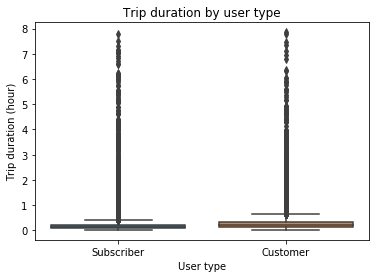

In [36]:
sb.boxplot(data=df, x='user_type', y='duration_hour').set(title='Trip duration by user type', xlabel='User type', ylabel='Trip duration (hour)');

When looking at the trip duration in hours by the user type, we can see that both user type groups have around the same trip duration on average. We also see that for both groups, there are some outlier trips where the trip duration is around 7-8 hours.

### Trip duration between genders

Text(0.5,21.7062,'Trip duration (min)')

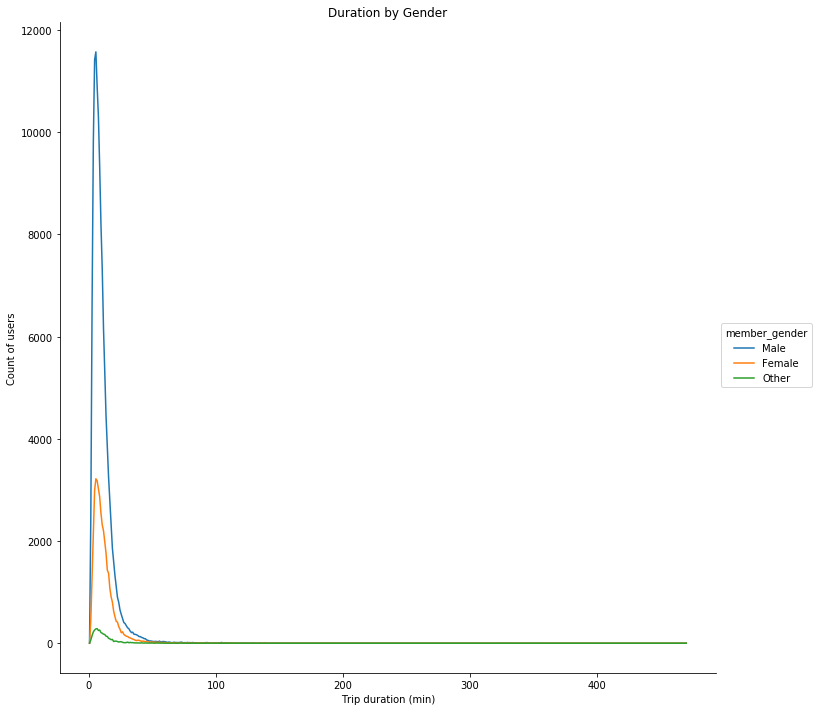

In [37]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

bin_edges = np.arange(0, df['duration_min'].max(), 1)
g = sb.FacetGrid(data = df, hue = 'member_gender', size = 10).set(title='Duration by Gender')
g.map(freq_poly, "duration_min", bins = bin_edges)
g.add_legend()
g.axes[0,0].set_ylabel('Count of users')
g.axes[0,0].set_xlabel('Trip duration (min)')

When breaking down the trip duration in minutes by gender, we see that all gender types have around the same trip duration with most trips falling under an hour. We see that trips made by male users are slighlty longer by a couple minutes on average.

### Trip duration between birth groups

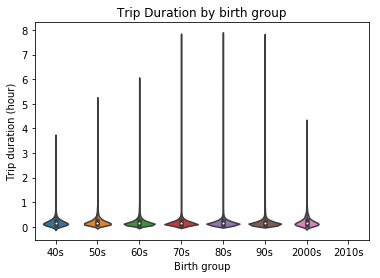

In [47]:
sb.violinplot(data=df, x='birth_group', y='duration_hour', order = ['40s', '50s','60s','70s','80s','90s','2000s','2010s']).set(title='Trip Duration by birth group', xlabel='Birth group', ylabel='Trip duration (hour)');

Breaking down trip duration by birth group, we see that all birth groups have on average the same trip duration of roughly under an hour. However, we see that those born in the 70s, 80s and 90s have outlier trips of 7-8 hours. Those in the 40s and 2000s have the smallest outlier spread with the highest being some where around 4 hours.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- When looking at the users by the age/birth group, all age groups use the bikeshare system only for part of their trip. The 80s group had the highest number of users using it for a partial trip while the 90s group had the highest number of users using it for a full trip.
- In terms of the type of user by birth/age group, those born in the 80s had the highest number of subscribers and customers. It should also be noted that the number of subscribers were higher than customers across all age groups.
- On average, there tends to be more male users compared to those identified as female or other regardless of subscriber or customer status.
- Users in the 80s birth group had the highest number of males but tied closely with those in the 90s birth group when it came to female users
- Between subscribers and customers, the average trip duration time in hours is roughly within an hour.
- The average duration in minutes between the genders fall roughly the same with all being under and hour on average. Male users tended to have longer durations compared to females and those identified as others but the difference is minimal in terms of minutes.
- In terms of the trip duration for the birth groups, those born in the 70s, 80s and 90s had users with longer duration while those born in the 2000s and 40s had shorter durations. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Some interesting relationships include the gender breakdown between birth groups. It shows that regardless of the birth group, male users are more common.
- Another interesting relationship is the trip duration and birht groups, where we saw that certain age groups had users that had longer than average trip durations but the youngest group (2000s) had relatively short durations.

## Multivariate Exploration


[Text(0,0.5,'Trip duration (min)'),
 Text(0.5,0,'Birth group'),
 Text(0.5,1,'Trip duration by birth group and user types')]

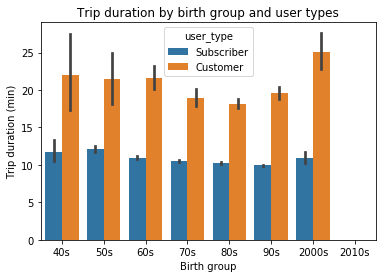

In [48]:
sb.barplot(data = df, x = 'birth_group', y = 'duration_min', hue = 'user_type', order = ['40s', '50s','60s','70s','80s','90s','2000s','2010s']).set(title='Trip duration by birth group and user types', xlabel='Birth group', ylabel='Trip duration (min)')

When looking at the trip duration by birth group and user type, we actually see that customers tended to make longer trips compared to subscribers for all birth groups. Subscribers typically made trips with the same duration across all birth groups.

[Text(0,0.5,'Trip duration (min)'),
 Text(0.5,0,'Gender'),
 Text(0.5,1,'Trip duration by user type and Gender')]

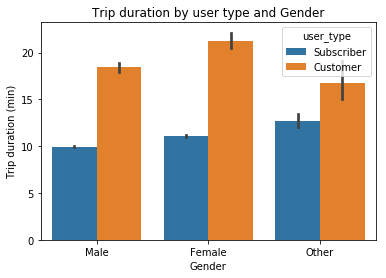

In [50]:
sb.barplot(data = df, x = 'member_gender', y = 'duration_min', hue = 'user_type').set(title='Trip duration by user type and Gender', xlabel='Gender', ylabel='Trip duration (min)')

When looking at trip duration by user type and gender, again we see that customers have the longest trips, with female customers making the longest trips. In terms of subscribers, those identified as other made the longest trips.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- When looking at the trip duration between birth group and user type, we see that regardless of birth group, those that are customers have longer trip durations. Customers born in the 2000s also had the longest trip duration.
- Breaking down trip duration by gender and user type, we also see that customers have longer trip durations with those identifying as female having the longest trips
- Combining trip duration and user type produced a better understanding of the users of used the system as we are able to see the gender breakdown by combining it with gender and can also see the age breakdown by using the birth group.

### Were there any interesting or surprising interactions between features?

- A surprising result was that customers on average had longer trip durations regardless of gender or birth group. Initially I though subscribers would have longer durations as they'd subscribed to the service so would use the bikeshare program for more trips including further trips.

## Conclusions

With the intention of examining the different characteristics of bike share users, we were able to see that the most popular start times for trips matched closely with the commuting hours of the 9 to 5 work schedule. We also saw that the system was more popular with subscribers than customers and that the age group breakdown for users leaned towards young adults, especially those born in the 80s/90s. The average trip duration was relatively short with most trips being under an hour. For all birth groups, customers tended to have longer trip durations compared to existing subscribers. This was also true when looking at trip durations by gender.
